# Równanie falowe dla struny

In [ ]:
 import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import time

In [ ]:
sns.set(font="Times New Roman")
sns.set_context("paper", font_scale=1.2)


## Zadanie 1

In [ ]:
N_x = 101
dt =  0.005
N_t = 1001
N_w = 101
dx =  0.01
dw =  0.1
N_t2 = 2001

beta =  4
x0 =  0.5
t1 =  16
t2 =  20


In [ ]:

# Równanie u0

def u0(x):
  return np.exp(-100*(x-0.5)**2)

In [ ]:
def sztywne_warunki():

  _v = np.zeros((N_x,N_t))
  _u = np.zeros((N_x,N_t))
  _a = np.zeros((N_x,N_t))

  for i in range(0,N_x):

    _u[i,0] = u0(i * dx)
    _v[i,0] = 0
    _a[i,0] = 0
	
  for i in range(0,N_t):

    _u[0,i] = 0
    _v[0,i] = 0
    _a[0,i] = 0

    _u[100,i] = 0
    _v[100,i] = 0
    _a[100,i] = 0
	
  for j in range(1,N_t):
    for i in range(1,N_x-1):
      _u[i,j] = _u[i,j-1] + dt * _v[i,j-1] + 0.5 * _a[i,j-1] * dt**2
    for i in range(1,N_x-1):
      _a[i,j] = (_u[i+1,j] + _u[i-1,j] - 2 * _u[i,j]) / (dx**2)
    for i in range(1,N_x-1):
      _v[i,j] = _v[i,j-1] + 0.5 * dt * (_a[i,j] + _a[i,j-1])

  return _u,_v

def fala_calc_szt(t0 = 0,r = True):

  _u,_v = sztywne_warunki()
 
  if r:
    u = []
    x = []
    t = []
    _t0 = t0



    for i in range(0,N_x):
      for j in range(0,N_t):
        u.append(_u[i,_t0])
        x.append(i*dx)
        t.append(j*dt)

  else:
      u = []
      x = []
      t = []
      for i in range(0,N_x):
        for j in range(0,N_t):
          u.append(_u[i,j])
          x.append(i*dx)
          t.append(j*dt)

  
  return u,x,t

In [ ]:
_t = [0,20,40,80]

u = []
x = []
t = []

for i in _t:
  u1,x1,t1 = fala_calc_szt(i)
  u.append(u1)
  x.append(x1)
  t.append(t1)



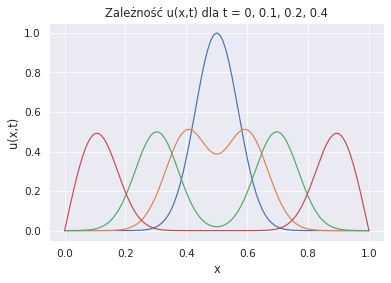

In [ ]:
plt.plot(x[0],u[0],x[0],u[1],x[0],u[2],x[0],u[3])
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Zależność u(x,t) dla t = 0, 0.1, 0.2, 0.4')
plt.show()

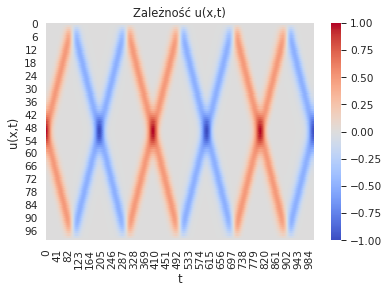

In [ ]:
u2,v2 = sztywne_warunki()
sns.heatmap(u2,cmap="coolwarm")
plt.xlabel('t')
plt.ylabel('u(x,t)')
plt.title('Zależność u(x,t)')
plt.show()

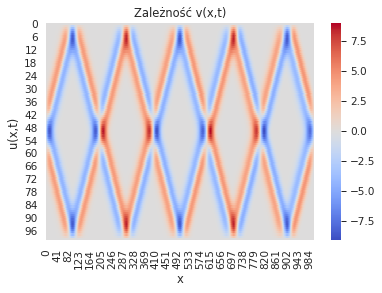

In [ ]:
sns.heatmap(v2,cmap="coolwarm")
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Zależność v(x,t)')
plt.show()

## Zadanie 2

In [ ]:
def luźne_warunki():

  _v = np.zeros((N_x,N_t))
  _u = np.zeros((N_x,N_t))
  _a = np.zeros((N_x,N_t))

  for i in range(0,N_x):

    _u[i,0] = u0(i * dx)
    _v[i,0] = 0
    _a[i,0] = 0
	
  for i in range(0,N_t):

    _u[0,i] = 0
    _v[0,i] = 0
    _a[0,i] = 0

    _u[100,i] = 0
    _v[100,i] = 0
    _a[100,i] = 0
	
  for j in range(1,N_t):
    for i in range(1,N_x-1):
      _u[i,j] = _u[i,j-1] + dt * _v[i,j-1] + 0.5 * _a[i,j-1] * dt**2
    _u[0,j] = _u[1,j]
    _u[100,j] = _u[99,j]
    for i in range(1,N_x-1):
      _a[i,j] = (_u[i+1,j] + _u[i-1,j] - 2 * _u[i,j]) / (dx**2)
    for i in range(1,N_x-1):
      _v[i,j] = _v[i,j-1] + 0.5 * dt * (_a[i,j] + _a[i,j-1])

  return _u,_v

def fala_calc_luz(t0 = 0,r = True):

  _u,_v = luźne_warunki()
 
  if r:
    u = []
    x = []
    t = []
    _t0 = t0



    for i in range(0,N_x):
      for j in range(0,N_t):
        u.append(_u[i,_t0])
        x.append(i*dx)
        t.append(j*dt)

  else:
      u = []
      x = []
      t = []
      for i in range(0,N_x):
        for j in range(0,N_t):
          u.append(_u[i,j])
          x.append(i*dx)
          t.append(j*dt)

  
  return u,x,t

In [ ]:
_t = [0,20,40,80]

u = []
x = []
t = []

for i in _t:
  u1,x1,t1 = fala_calc_luz(i)
  u.append(u1)
  x.append(x1)
  t.append(t1)



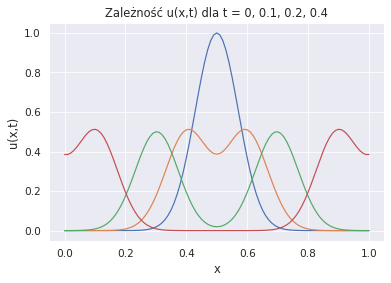

In [ ]:
plt.plot(x[0],u[0],x[0],u[1],x[0],u[2],x[0],u[3])
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Zależność u(x,t) dla t = 0, 0.1, 0.2, 0.4')
plt.show()

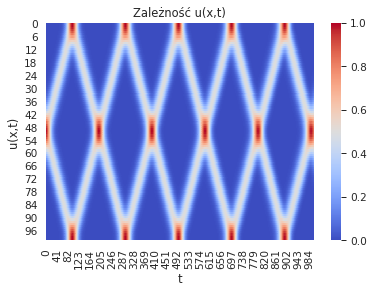

In [ ]:
u2,v2 = luźne_warunki()
sns.heatmap(u2,cmap="coolwarm")
plt.xlabel('t')
plt.ylabel('u(x,t)')
plt.title('Zależność u(x,t)')
plt.show()

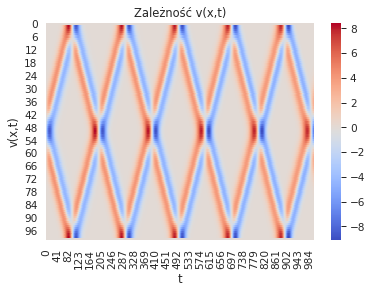

In [ ]:
sns.heatmap(v2,cmap="coolwarm")
plt.xlabel('t')
plt.ylabel('v(x,t)')
plt.title('Zależność v(x,t)')
plt.show()

## Zadanie 3


In [ ]:
def sztywne_warunki_tłum(beta):

  _v = np.zeros((N_x,N_t))
  _u = np.zeros((N_x,N_t))
  _a = np.zeros((N_x,N_t))
  _ab = np.zeros((N_x,N_t))

  for i in range(0,N_x):

    _u[i,0] = u0(i * dx)
    _v[i,0] = 0
    _a[i,0] = 0
    _ab[i,0] = 0
	
  for i in range(0,N_t):

    _u[0,i] = 0
    _v[0,i] = 0
    _a[0,i] = 0
    _ab[0,i] = 0

    _u[100,i] = 0
    _v[100,i] = 0
    _a[100,i] = 0
    _ab[100,i] = 0
	
  for j in range(1,N_t):
    for i in range(1,N_x-1):
      _u[i,j] = _u[i,j-1] + dt * _v[i,j-1] + 0.5 * _a[i,j-1] * dt**2
    for i in range(1,N_x-1):
      _a[i,j] = (_u[i+1,j] + _u[i-1,j] - 2 * _u[i,j]) / (dx**2)
    for i in range(1,N_x-1):
      _v[i,j] = (_v[i,j-1] + 0.5 * dt * (_a[i,j] + _ab[i,j-1]))/(1+beta*dt)
    for i in range(1,N_x-1):
      _ab[i,j] = _a[i,j] - 2 * beta * _v[i,j]

  return _u,_v

def fala_calc_tłum(beta,t0 = 0,r = True):

  _u,_v = sztywne_warunki_tłum(beta)
 
  if r:
    u = []
    x = []
    t = []
    _t0 = t0



    for i in range(0,N_x):
      for j in range(0,N_t):
        u.append(_u[i,_t0])
        x.append(i*dx)
        t.append(j*dt)

  else:
      u = []
      x = []
      t = []
      for i in range(0,N_x):
        for j in range(0,N_t):
          u.append(_u[i,j])
          x.append(i*dx)
          t.append(j*dt)

  
  return u,x,t

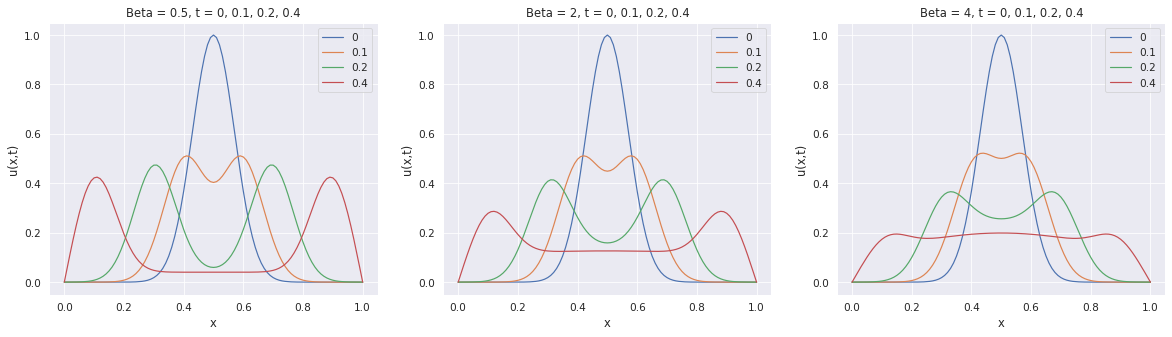

In [ ]:
_t = [0,20,40,80]
_beta = [0.5,2,4]

u = []
x = []
t = []


for i in range(len(_beta)):
  for j in _t:
    u1,x1,t1 = fala_calc_tłum(_beta[i],j)
    u.append(u1)
    x.append(x1)
    t.append(t1)

fig, (ax0,ax1,ax2) =plt.subplots(ncols=3,figsize=[20,5])
ax0.plot(x[0],u[0],x[0],u[1],x[0],u[2],x[0],u[3])
ax0.set(xlabel="x", ylabel='u(x,t)',
title='Beta = '+str(0.5)+', t = 0, 0.1, 0.2, 0.4')
ax0.legend(['0','0.1','0.2','0.4'])
  
ax1.plot(x[0],u[4],x[0],u[5],x[0],u[6],x[0],u[7])
ax1.set(xlabel="x", ylabel='u(x,t)',
title='Beta = '+str(2)+', t = 0, 0.1, 0.2, 0.4')
ax1.legend(['0','0.1','0.2','0.4'])
  
ax2.plot(x[0],u[8],x[0],u[9],x[0],u[10],x[0],u[11])
ax2.set(xlabel="x", ylabel='u(x,t)',
title='Beta = '+str(4)+', t = 0, 0.1, 0.2, 0.4')
ax2.legend(['0','0.1','0.2','0.4'])
  

    


Text(0.5, 1.0, 'Zależność u(x,t)')

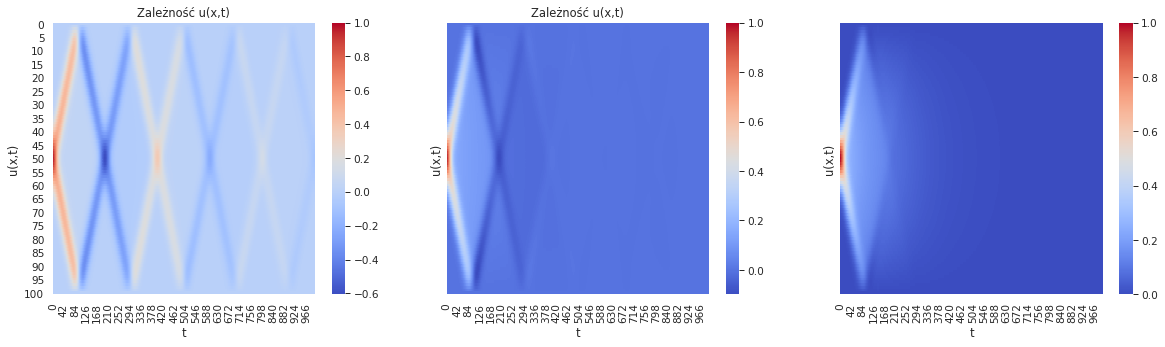

In [ ]:
u = []
v = []

for i in _beta:
  u2,v2 = sztywne_warunki_tłum(i)
  u.append(u2)
  v.append(v2)


f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize = [20,5])
g1 = sns.heatmap(u[0],ax=ax1,cmap="coolwarm")
g1.set_ylabel('u(x,t)')
g1.set_xlabel('t')
g1.set_title('Zależność u(x,t)')
g2 = sns.heatmap(u[1],ax=ax2,cmap="coolwarm")
g2.set_ylabel('u(x,t)')
g2.set_xlabel('t')
g2.set_title('Zależność u(x,t)')
g3 = sns.heatmap(u[2],ax=ax3,cmap="coolwarm")
g3.set_ylabel('u(x,t)')
g3.set_xlabel('t')
g2.set_title('Zależność u(x,t)')

Text(0.5, 1.0, 'Zależność v(x,t)')

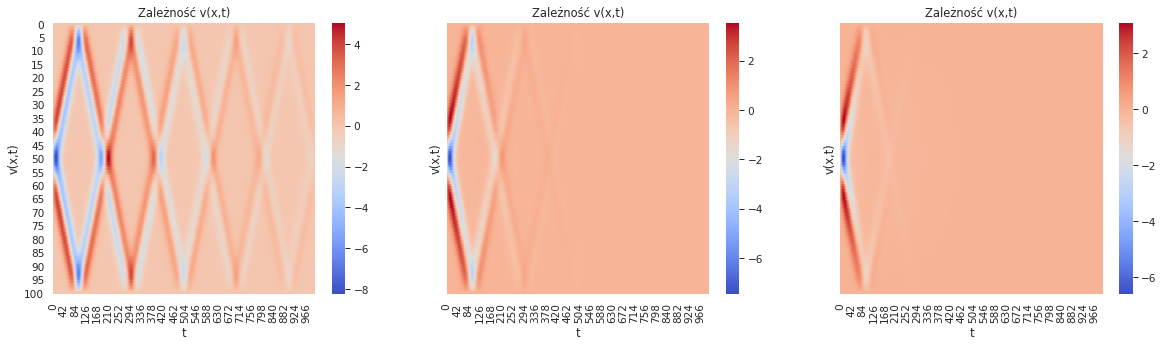

In [ ]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize = [20,5])
g1 = sns.heatmap(v[0],ax=ax1,cmap="coolwarm")
g1.set_ylabel('v(x,t)')
g1.set_xlabel('t')
g1.set_title('Zależność v(x,t)')
g2 = sns.heatmap(v[1],ax=ax2,cmap="coolwarm")
g2.set_ylabel('v(x,t)')
g2.set_xlabel('t')
g2.set_title('Zależność v(x,t)')
g3 = sns.heatmap(v[2],ax=ax3,cmap="coolwarm")
g3.set_ylabel('v(x,t)')
g3.set_xlabel('t')
g3.set_title('Zależność v(x,t)')

## Zadanie 4

In [ ]:
def af(x,t,w):
    ret=0
    if x*dx == 1/2:
        ret=np.cos(w*t*dt)
    return ret

t=np.arange(0,10,dt)

In [ ]:
def sztywne_warunki_wym(beta=1,w=np.pi/2):
  x0 = 0.5

  _v = np.zeros((N_x,N_t2))
  _u = np.zeros((N_x,N_t2))
  _a = np.zeros((N_x,N_t2))
  _ab = np.zeros((N_x,N_t2))
  _af = np.zeros((N_x,N_t2))

	
  for j in range(1,N_t2):
    
    for i in range(1,N_x-1):
      _u[i,j] = _u[i,j-1] + dt * _v[i,j-1] + 0.5 * _a[i,j-1] * dt**2

    for i in range(1,N_x-1):
      if i>0 and i<N_x-1:
        _a[i,j] = (_u[i+1,j] + _u[i-1,j] - 2 * _u[i,j]) / (dx**2)
      else:
        _a[i,j] = 0

    for i in range(1,N_x-1):

      _v[i,j] = (_v[i,j-1] + 0.5 * dt * (_a[i,j] + _ab[i,j-1]+ af(i,j,w)+af(i,j-1,w)))/(1+beta*dt)
    
    for i in range(1,N_x-1):
      _ab[i,j] = _a[i,j] - 2 * beta * _v[i,j]

  return _u,_v

def fala_calc_wym(t0 = 0,r = True):

  _u,_v = sztywne_warunki_wym()
 
  if r:
    u = []
    x = []
    t = []
    _t0 = t0



    for i in range(0,N_x):
      for j in range(0,N_t2):
        u.append(_u[i,_t0])
        x.append(i*dx)
        t.append(j*dt)

  else:
      u = []
      x = []
      t = []
      for i in range(0,N_x):
        for j in range(0,N_t2):
          u.append(_u[i,j])
          x.append(i*dx)
          t.append(j*dt)

  
  return u,x,t

In [ ]:
_t = [0,20,40,80]

u2 = []
x2 = []
t2 = []

for i in _t:
  u1,x1,t1 = fala_calc_wym(i)
  u2.append(u1)
  x2.append(x1)
  t2.append(t1)


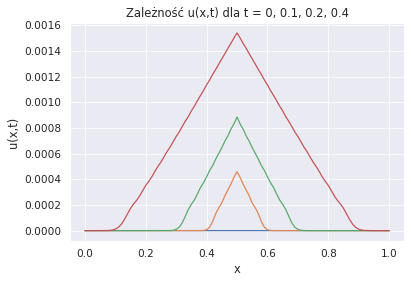

In [ ]:
plt.plot(x2[0],u2[0],x2[0],u2[1],x2[0],u2[2],x2[0],u2[3])
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Zależność u(x,t) dla t = 0, 0.1, 0.2, 0.4')
plt.show()

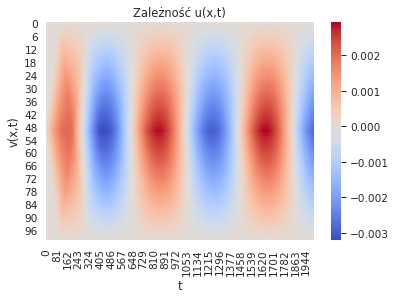

In [ ]:
u2,v2 = sztywne_warunki_wym()
sns.heatmap(u2,cmap="coolwarm")
plt.xlabel('t')
plt.ylabel('v(x,t)')
plt.title('Zależność u(x,t)')
plt.show()

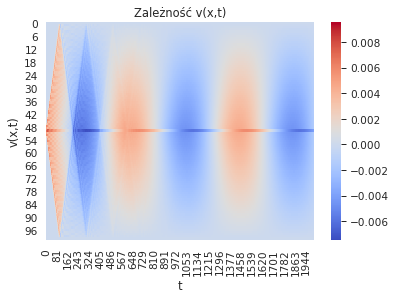

In [ ]:
sns.heatmap(v2,cmap="coolwarm")
plt.xlabel('t')
plt.ylabel('v(x,t)')
plt.title('Zależność v(x,t)')
plt.show()

## Zadanie 5

In [ ]:
def rez(beta=1,w=np.pi/2):
  x0 = 0.4
  t2=20
  t1=16
  E = 0
  time3= np.arange(0,t2,dt)
  N_t3= int( (t2)/dt)
  

  _v = np.zeros((N_x,N_t3))
  _u = np.zeros((N_x,N_t3))
  _a = np.zeros((N_x,N_t3))
  _ab = np.zeros((N_x,N_t3))
  _af = np.zeros((N_x,N_t3))

  for i in range(N_x):
        _u[i][0]=0

  E=0
  for j in range(1,N_t3):

    du=[]
    for i in range(1,N_x-1):
      du.append((_u[i+1,j]-_u[i,j])**2)
    du.append(0)
    
    for i in range(1,N_x-1):
      _u[i,j] = _u[i,j-1] + dt * _v[i,j-1] + 0.5 * _a[i,j-1] * dt**2

    for i in range(1,N_x-1):
      if i>0 and i<N_x-1:
        _a[i,j] = (_u[i+1,j] + _u[i-1,j] - 2 * _u[i,j]) / (dx**2)
      else:
        _a[i,j] = 0

    for i in range(1,N_x-1):

      if (i * dx == x0):
        _af[i,j] = np.cos(w*j*dt)
      else:
        _af[i,j] = 0	

      _v[i,j] = (_v[i,j-1] + 0.5 * dt * (_a[i,j] + _ab[i,j-1]+ _af[i,j]+_af[i,j-1]))/(1+beta*dt)
      if t2>j*dt>t1:
        E+=(_v[i,j]**2)*dx
    for i in range(1,N_x-1):
      _ab[i,j] = _a[i,j] - 2 * beta * _v[i,j]

    if t2>j*dt>t1:
       E+=sum(du)
  
  return (E/2)/(t2-t1)


In [ ]:
ep = []
w_range=np.linspace(0*np.pi,10*np.pi,200)
for w in w_range:
  e = rez(1,w)
  ep.append(e)

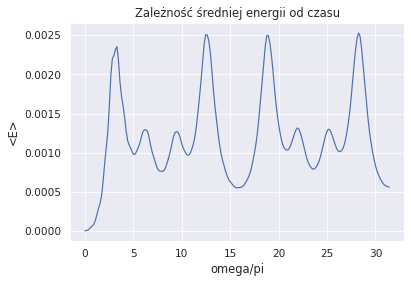

In [ ]:
plt.plot(w_range,ep)
plt.xlabel('omega/pi')
plt.ylabel('<E>')
plt.title('Zależność średniej energii od czasu')
plt.show()